## ランダムフォレスト

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Iris問題を解いてみる
petal : 花弁  
sepal : がく片

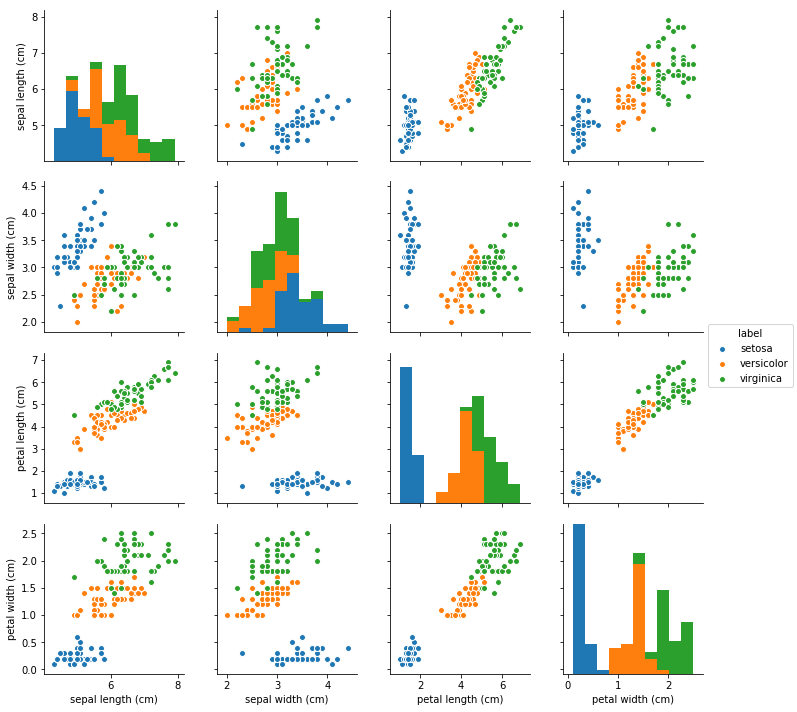

In [2]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
sns.pairplot(df_iris, hue="label")

### ランダムフォレスト

score= 0.9733333333333334
[0.05925518 0.         0.48585191 0.45489291]


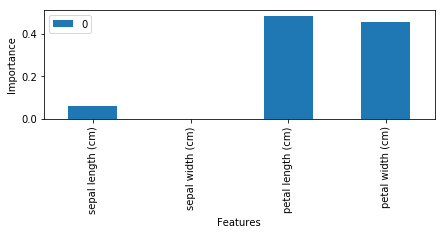

In [3]:
from sklearn.ensemble import RandomForestClassifier

X_train = iris.data
y_train = iris.target

clf = RandomForestClassifier(n_estimators=10, max_depth=2, criterion="gini",
                                                 min_samples_leaf=2, min_samples_split=2, random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_train, y_train))

# 説明変数の重要度を出力する
# scikit-learnで算出される重要度は、ある説明変数による不純度の減少量合計である。
print(clf.feature_importances_)
pd.DataFrame(clf.feature_importances_, index=iris.feature_names).plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

### [演習]
* 不純度の評価方法を変更してみましょう
* max_depthの値を変更してみましょう
* min_samples_splitの値を変更してみましょう
* min_samples_leafの値を変更してみましょう
* n_estimatrosの値を変更してみましょう

### 各決定木を描画する方法

0


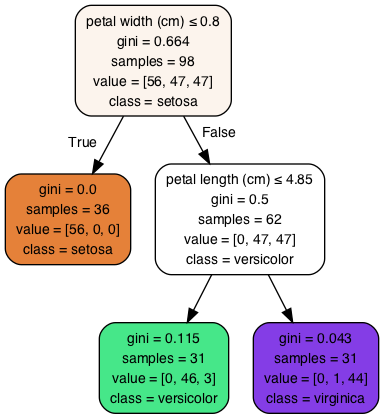

1


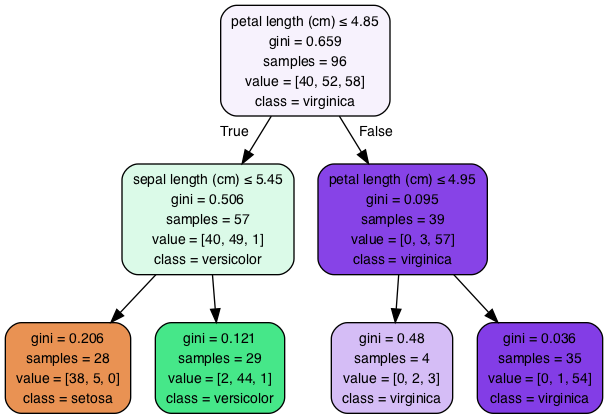

2


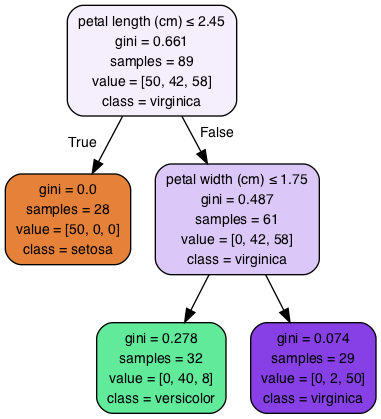

3


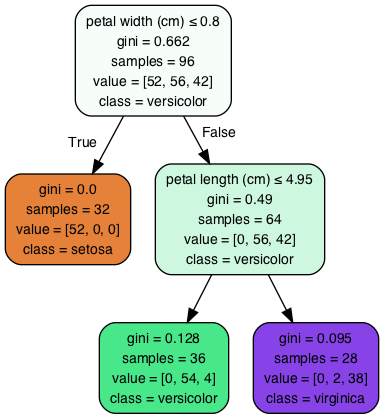

4


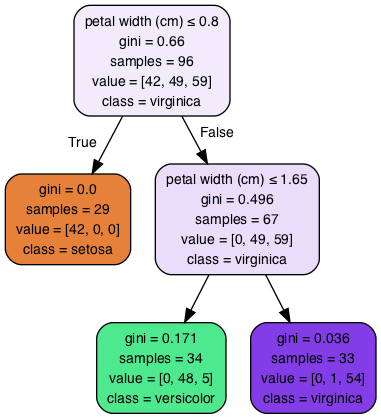

5


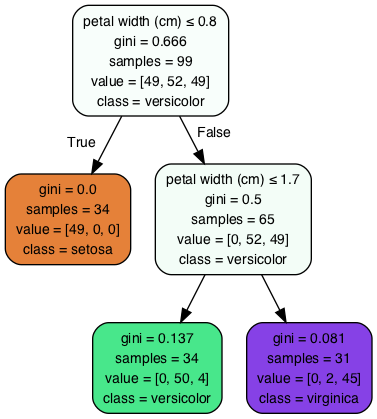

6


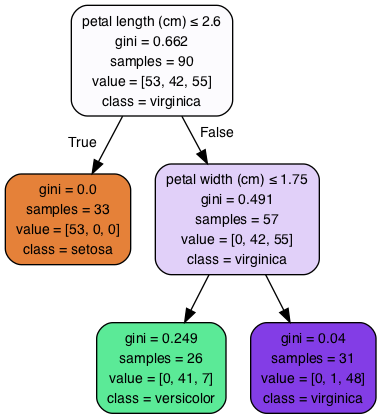

7


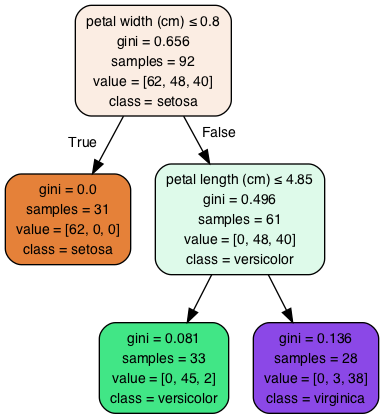

8


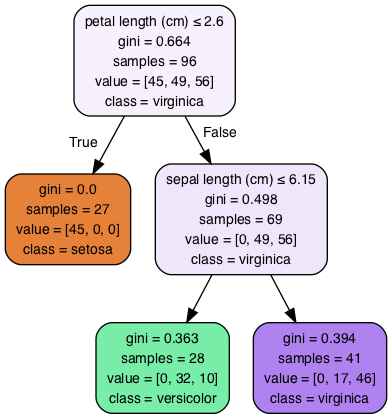

9


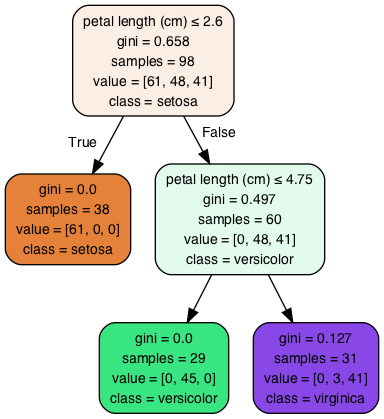

In [4]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

for i, est in enumerate(clf.estimators_):
    print(i)
    
    # 決定木の描画
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(est, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    display(Image(graph.create_png()))